### Importing the Required Libraries & Dataset

In [243]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv("Google-Play-Store-Apps.csv")

### Displaying the top 3 Rows of the Dataset

In [244]:
data.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


### Displaying the Last 3 Rows of the Dataset

In [245]:
data.tail(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


### Finding the Shape of the Dataset[No. of the Rows & Columns]

In [246]:
print("No. of the Rows:",data.shape[0])
print("No.of the Columns:",data.shape[1])

No. of the Rows: 10841
No.of the Columns: 13


### Getting the Info of the Dataset

In [247]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


### Getting the Overall Statistics of the Dataset

In [248]:
data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


### Total No.of the App Titles Containing the 'Astrology'

In [249]:
len(data[data["App"].str.contains("Astrology",case=False)])

3

### Find the Average App Rating

In [250]:
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [251]:
data["Rating"].fillna(data["Rating"].mean(),inplace=True)

In [252]:
print("The Average App Rating:",data["Rating"].mean())

The Average App Rating: 4.193338315362443


### Find the Total No. of the Unique Categories

In [253]:
data["Category"].nunique()

34

### Which Category is getting the Highest Rating

In [254]:
data.groupby("Category")["Rating"].max().sort_values(ascending=False)

Category
1.9                    19.0
TRAVEL_AND_LOCAL        5.0
SPORTS                  5.0
SOCIAL                  5.0
SHOPPING                5.0
PRODUCTIVITY            5.0
PHOTOGRAPHY             5.0
PERSONALIZATION         5.0
PARENTING               5.0
NEWS_AND_MAGAZINES      5.0
MEDICAL                 5.0
LIFESTYLE               5.0
LIBRARIES_AND_DEMO      5.0
ART_AND_DESIGN          5.0
HEALTH_AND_FITNESS      5.0
GAME                    5.0
FOOD_AND_DRINK          5.0
FINANCE                 5.0
FAMILY                  5.0
EVENTS                  5.0
DATING                  5.0
COMMUNICATION           5.0
COMICS                  5.0
BUSINESS                5.0
BOOKS_AND_REFERENCE     5.0
TOOLS                   5.0
MAPS_AND_NAVIGATION     4.9
VIDEO_PLAYERS           4.9
EDUCATION               4.9
BEAUTY                  4.9
AUTO_AND_VEHICLES       4.9
HOUSE_AND_HOME          4.8
WEATHER                 4.8
ENTERTAINMENT           4.7
Name: Rating, dtype: float64

### Find the total No. of the Apps having the 5 Star Rating

In [255]:
len(data[data["Rating"]==5.0])

274

### Find the Average Value of the Reviews

In [256]:
data["Reviews"].astype('float')

ValueError: could not convert string to float: '3.0M'

In [257]:
data[data["Reviews"]=='3.0M']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [258]:
data["Reviews"][10472]=3.0

In [259]:
data["Reviews"]=data["Reviews"].astype('float')

In [260]:
data["Reviews"].describe()

count    1.084100e+04
mean     4.441119e+05
std      2.927629e+06
min      0.000000e+00
25%      3.800000e+01
50%      2.094000e+03
75%      5.476800e+04
max      7.815831e+07
Name: Reviews, dtype: float64

In [261]:
data.dtypes

App                object
Category           object
Rating            float64
Reviews           float64
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [262]:
data["Reviews"].mean()

444111.9265750392

### Find the total No. of the Free & Paid Apps

In [263]:
data["Type"].value_counts()

Type
Free    10039
Paid      800
0           1
Name: count, dtype: int64

In [264]:
data["Type"].value_counts()

Type
Free    10039
Paid      800
0           1
Name: count, dtype: int64

<Axes: xlabel='Type', ylabel='count'>

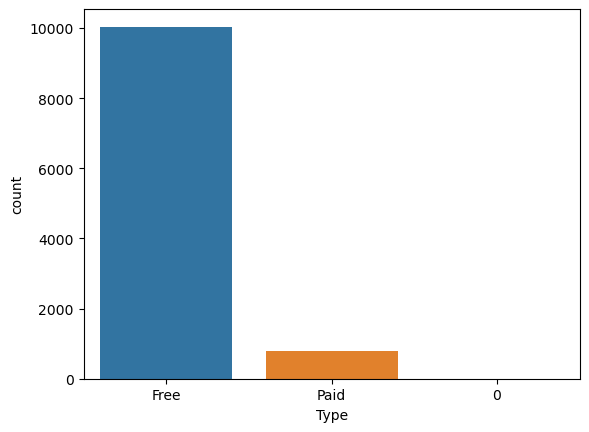

In [265]:
sns.countplot(x="Type",data=data)

### Which App has the Highest No. of the Reviews

In [266]:
data["Reviews"].describe()

count    1.084100e+04
mean     4.441119e+05
std      2.927629e+06
min      0.000000e+00
25%      3.800000e+01
50%      2.094000e+03
75%      5.476800e+04
max      7.815831e+07
Name: Reviews, dtype: float64

In [267]:
data[data["Reviews"]==78158306.0]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2544,Facebook,SOCIAL,4.1,78158306.0,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"August 3, 2018",Varies with device,Varies with device


### Display the Top 5 Apps with Respect to the Reviews

In [268]:
data.groupby('App')["Reviews"].mean().sort_values(ascending=False).head()

App
Facebook                                    7.814326e+07
WhatsApp Messenger                          6.911610e+07
Instagram                                   6.656050e+07
Messenger – Text and Video Chat for Free    5.664409e+07
Clash of Clans                              4.488970e+07
Name: Reviews, dtype: float64

### Find the Average Rating of the Free & Paid Apps

In [269]:
data.groupby('Type')["Rating"].mean()

Type
0       19.000000
Free     4.187141
Paid     4.252601
Name: Rating, dtype: float64

### Find the top 5 Apps having the maximum installs

In [270]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [276]:
data["Installs"] = data["Installs"].str.replace(",", "")

In [277]:
data["Installs-1"]=data["Installs"].str.replace("+","")

In [278]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs-1
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,10000+,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,10000
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,500000+,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,500000
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,5000000+,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,5000000
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,50000000+,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,50000000
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,100000+,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,100000


In [287]:
data["Installs-1"]=data["Installs-1"].str.replace("Free","100")

In [289]:
data[data["Installs-1"]=='Free']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs-1


In [290]:
data["Installs-1"].astype('int')

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10836        5000
10837         100
10838        1000
10839        1000
10840    10000000
Name: Installs-1, Length: 10841, dtype: int32

In [293]:
data.groupby("App")["Installs-1"].mean().sort_values(ascending=False).head()

App
ROBLOX                            1111111112222222248610786400688929745955845251...
Candy Crush Saga                  7142857149999999759159360014513120367101720532...
Duolingo: Learn Languages Free    1428571430000000066011687419379414558083221662...
8 Ball Pool                       1428571430000000066011687419379414558083221662...
Subway Surfers                    1666666666833333190036224309485528755718258525...
Name: Installs-1, dtype: object